In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


In [3]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to add channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [4]:
# Building the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7364 - loss: 0.7176 - val_accuracy: 0.8692 - val_loss: 0.3705
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.8722 - loss: 0.3503 - val_accuracy: 0.8852 - val_loss: 0.3177
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.8919 - loss: 0.2928 - val_accuracy: 0.8892 - val_loss: 0.2986
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9043 - loss: 0.2555 - val_accuracy: 0.8902 - val_loss: 0.3033
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9124 - loss: 0.2344 - val_accuracy: 0.9058 - val_loss: 0.2615
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9278 - loss: 0.2019 - val_accuracy: 0.9092 - val_loss: 0.2532
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - accuracy: 0.9327 - loss: 0.1832 - val_accuracy: 0.9107 - val_loss: 0.2538
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.9380 -

In [6]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 - 3s - 10ms/step - accuracy: 0.9052 - loss: 0.2883
Test Loss: 0.29
Test Accuracy: 0.91


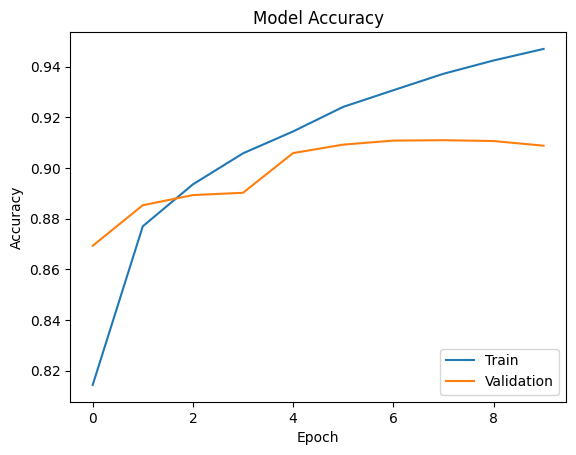

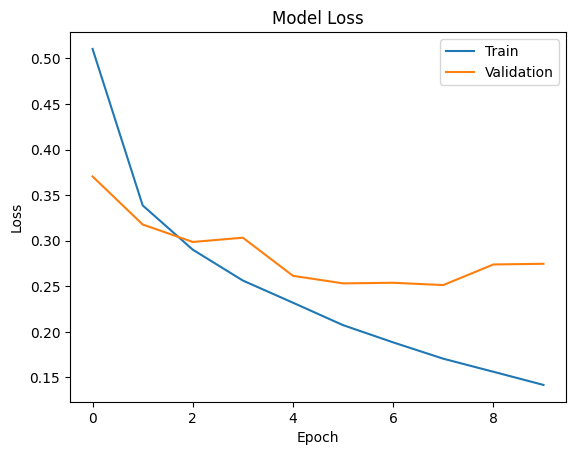

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


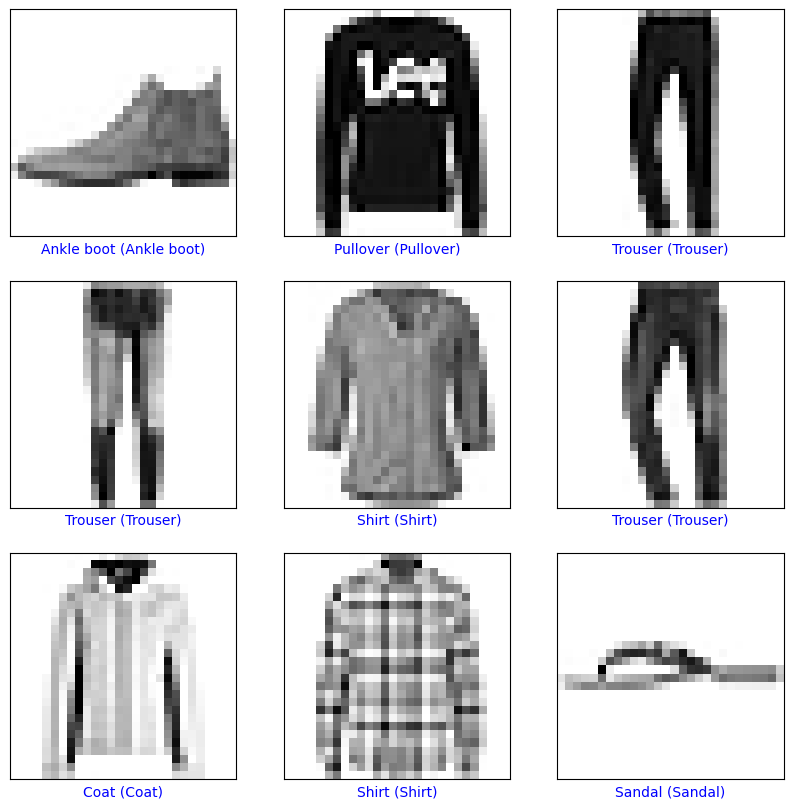

In [8]:
# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Predict on test set
predictions = model.predict(X_test)

# Show some sample predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.show()